# 1.3.1

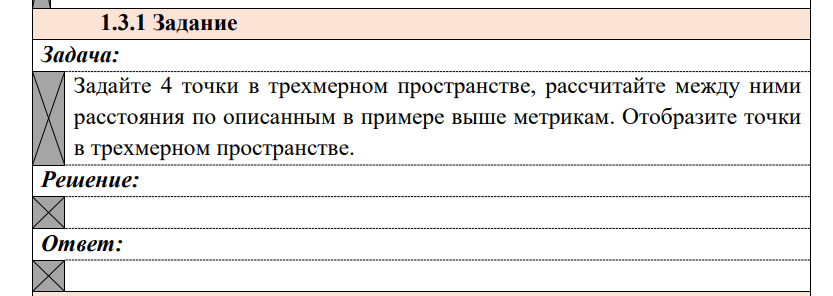

Евклидово расстояние между точками a и b = 4.0
Квадрат Евклидова расстояния между точками a и b = 16.0
Расстояние Чебышева между точками a и b = 4.0
Расстояние Хемминга между точками a и b = 4.0
pip
Евклидово расстояние между точками a и c = 5.0
Квадрат Евклидова расстояния между точками a и c = 25.0
Расстояние Чебышева между точками a и c = 5.0
Расстояние Хемминга между точками a и c = 5.0
pip
Евклидово расстояние между точками a и d = 7.0710678118654755
Квадрат Евклидова расстояния между точками a и d = 50.00000000000001
Расстояние Чебышева между точками a и d = 5.0
Расстояние Хемминга между точками a и d = 10.0
pip
Евклидово расстояние между точками b и a = 4.0
Квадрат Евклидова расстояния между точками b и a = 16.0
Расстояние Чебышева между точками b и a = 4.0
Расстояние Хемминга между точками b и a = 4.0
pip
Евклидово расстояние между точками b и c = 1.0
Квадрат Евклидова расстояния между точками b и c = 1.0
Расстояние Чебышева между точками b и c = 1.0
Расстояние Хемминга между т

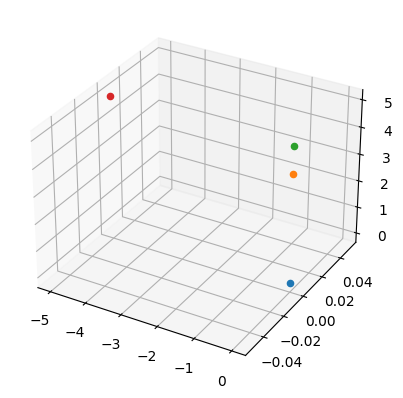

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = [0, 0, 0]
a = np.array(a)
b = np.array([0, 0, 4])
c = np.array([0, 0, 5])
d = np.array([-5, 0, 5])
np_list  = [a, b, c, d]
names = ['a', 'b', 'c', 'd']
for i in range(len(np_list)):
  for j in range(len(np_list)):
    if i != j:
      print(f'Евклидово расстояние между точками {names[i]} и {names[j]} = {np.linalg.norm(np_list[i] - np_list[j])}')
      print(f'Квадрат Евклидова расстояния между точками {names[i]} и {names[j]} = {np.linalg.norm(np_list[i] - np_list[j])**2}')
      print(f'Расстояние Чебышева между точками {names[i]} и {names[j]} = {np.linalg.norm(np_list[i] - np_list[j], ord = np.inf)}')
      print(f'Расстояние Хемминга между точками {names[i]} и {names[j]} = {np.linalg.norm(np_list[i] - np_list[j], ord=1)}')
      print(f'pip')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0,0,0) # синяя
ax.scatter(0,0,4) # рыжая
ax.scatter(0,0,5) # зелёная
ax.scatter(-5,0,5) # красная
plt.show()



# 1.3.2

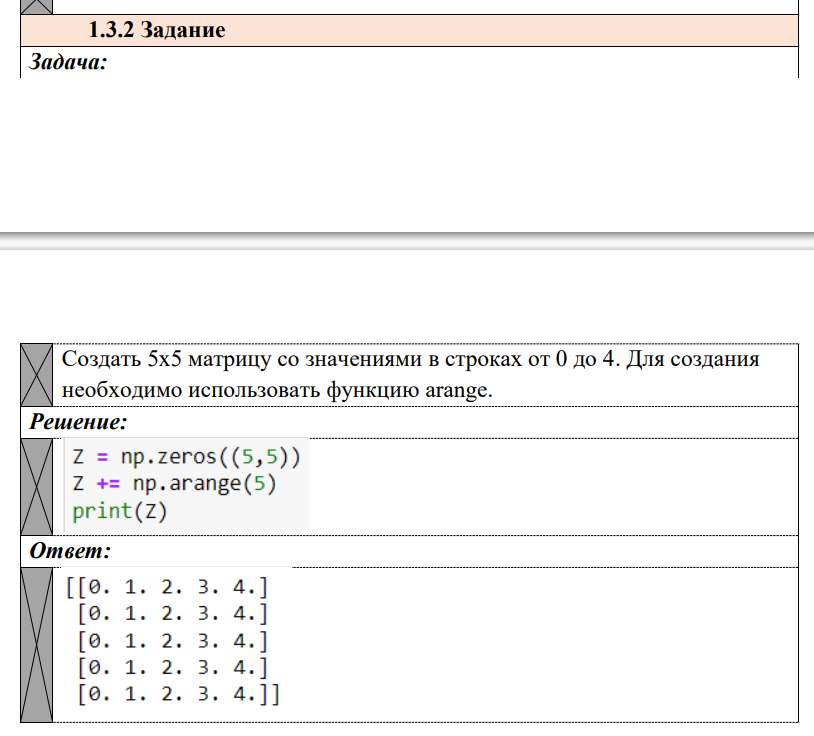

In [ ]:
import numpy as np

a = np.zeros((5, 5))
a += np.arange(5)
print(a)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# 2.3.1

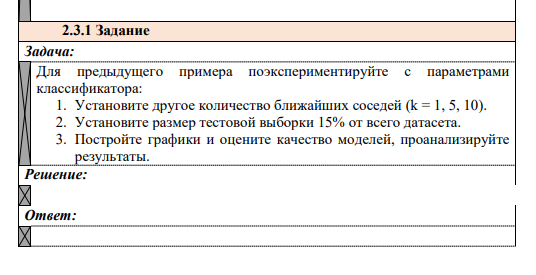

(127, 4) (23, 4) (127,) (23,)

     sepal_length  sepal_width  petal_length  petal_width
105           7.6          3.0           6.6          2.1
127           6.1          3.0           4.9          1.8
149           5.9          3.0           5.1          1.8
14            5.8          4.0           1.2          0.2
109           7.2          3.6           6.1          2.5

105    virginica
127    virginica
149    virginica
14        setosa
109    virginica
Name: species, dtype: object

['virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor']

accuracy: 1.0


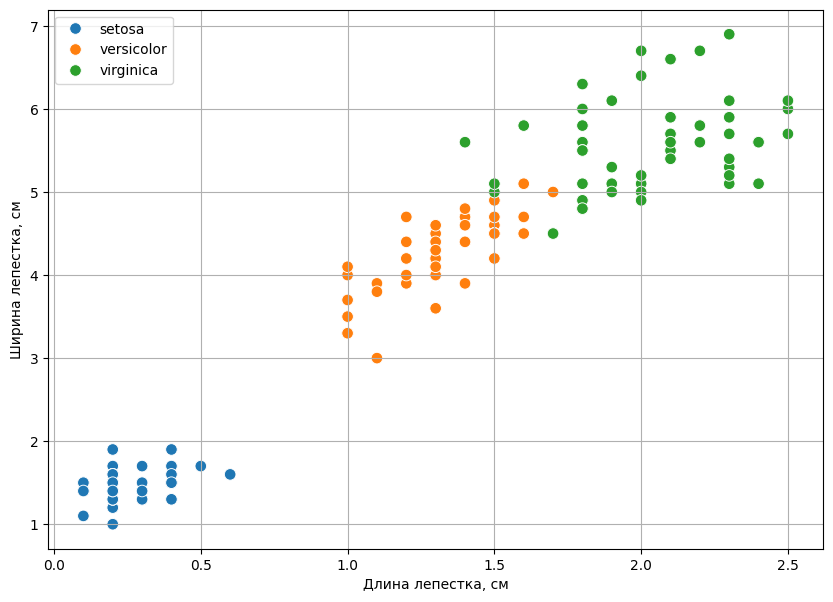

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,end='\n\n')
print(X_train.head(), end='\n\n')
print(y_train.head(), end = '\n\n')

k = 10

model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred,end='\n\n')

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y = 'petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
  if np.array(y_test)[i]!=y_pred[i]:
    plt.scatter(X_test.iloc[i,3], X_test.iloc[i, 2], color='red', s = 150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')



# 3.3.2

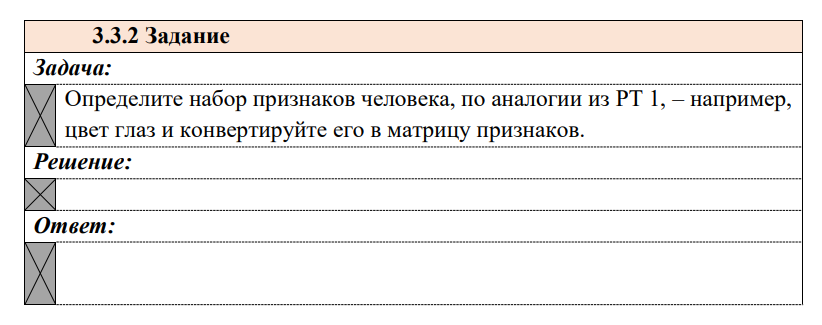

In [ ]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

a = pd.DataFrame({"Рост":["полторашка", "средний", "дылда"], "Возраст":["маленький", "молодой", "старый"]})
replacer = {"полторашка":150, "средний":165, "дылда":180, "маленький":5, "молодой":20, "старый":90}
a = a.replace(replacer)
print(a)
a = list(a)

b = [{"Рост":150, "Возраст": 20},
     {"Рост":180, "Возраст": 20},
     {"Рост":165, "Возраст": 90},
     {"Рост":180, "Возраст": 5}]
vectorize = DictVectorizer(sparse = False)
b = vectorize.fit_transform(b)
b

   Рост  Возраст
0   150        5
1   165       20
2   180       90


array([[ 20., 150.],
       [ 20., 180.],
       [ 90., 165.],
       [  5., 180.]])